In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from scipy import stats
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error
from pandas import Series

In [2]:
time_col = 'DateTime'
#df = pd.read_csv("C:/Users/Amina Lawal/Documents/My Thesis/WesternCape/AllDailyWC1.csv", index_col=time_col, parse_dates=[time_col])
#df = pd.read_csv('C:/Users/Amina Lawal/Documents/My Thesis/KZNDailySales.csv', header=0, index_col=0)
df = pd.read_csv('C:/Users/*', header=0, index_col=0)

In [3]:
df

,Loperamide,Windspeed,AirTemp,Evaporation,Humidity,Pressure,Precipitation,Tmax,Tmin
DateTime,,,,,,,,,
2008/11/17,7,2.578032,297.750,506.75,0.012425,90060.0,9.990000e-08,301.025,294.125
2008/11/18,8,3.889891,297.925,712.50,0.011975,90230.0,9.990000e-08,301.125,294.125
2008/11/19,12,4.062404,294.100,445.50,0.013200,90735.0,3.930000e-05,296.500,291.650
2008/11/20,13,2.393872,294.150,291.25,0.013050,90862.5,2.510000e-05,295.650,292.100
2008/11/21,15,2.864655,294.925,341.00,0.013425,90747.5,1.080000e-05,296.775,292.950
...,...,...,...,...,...,...,...,...,...
2019/02/28,18,1.546165,296.975,416.75,0.014050,90315.0,0.000000e+00,301.300,292.975
2019/03/01,54,2.238861,297.050,459.00,0.015150,90415.0,3.000000e-06,300.225,293.250
2019/03/02,58,2.343075,297.100,403.50,0.016275,90432.5,6.250000e-06,299.725,293.875


In [4]:
df.describe()

,Loperamide,Windspeed,AirTemp,Evaporation,Humidity,Pressure,Precipitation,Tmax,Tmin
count,3760.000000,3760.000000,3760.000000,3760.000000,3760.000000,3760.000000,3.760000e+03,3760.000000,3760.000000
mean,22.518617,1.976884,291.878278,392.106250,0.009886,90699.446144,2.163440e-05,295.673271,287.925233
std,11.402556,1.009129,5.465218,208.297005,0.004298,403.846435,4.854375e-05,4.900995,6.192532
min,0.000000,0.025000,274.825000,29.250000,0.000975,89547.500000,-2.330000e-10,281.175000,268.425000
25%,14.000000,1.252248,287.725000,232.187500,0.006300,90409.375000,0.000000e+00,292.225000,283.150000
50%,21.000000,1.856913,293.100000,346.000000,0.008950,90662.500000,0.000000e+00,295.900000,289.850000
75%,29.000000,2.536237,295.800000,520.312500,0.013506,90967.500000,9.312500e-06,299.175000,292.900000
max,92.000000,6.211683,304.450000,1196.250000,0.020150,92242.500000,4.385000e-04,309.700000,300.125000


In [5]:
df

,Loperamide,Windspeed,AirTemp,Evaporation,Humidity,Pressure,Precipitation,Tmax,Tmin
DateTime,,,,,,,,,
2008/11/17,7,2.578032,297.750,506.75,0.012425,90060.0,9.990000e-08,301.025,294.125
2008/11/18,8,3.889891,297.925,712.50,0.011975,90230.0,9.990000e-08,301.125,294.125
2008/11/19,12,4.062404,294.100,445.50,0.013200,90735.0,3.930000e-05,296.500,291.650
2008/11/20,13,2.393872,294.150,291.25,0.013050,90862.5,2.510000e-05,295.650,292.100
2008/11/21,15,2.864655,294.925,341.00,0.013425,90747.5,1.080000e-05,296.775,292.950
...,...,...,...,...,...,...,...,...,...
2019/02/28,18,1.546165,296.975,416.75,0.014050,90315.0,0.000000e+00,301.300,292.975
2019/03/01,54,2.238861,297.050,459.00,0.015150,90415.0,3.000000e-06,300.225,293.250
2019/03/02,58,2.343075,297.100,403.50,0.016275,90432.5,6.250000e-06,299.725,293.875


In [67]:
#Optional Cell
df['week2VAR1']= df['LoperamideSales'].shift()

In [68]:
df

,WindSpeed,AirTemp,Evaporation,Humidity,Pressure,Precipitation,Tmax,Tmin,LoperamideSales,week2VAR1
DateTime,,,,,,,,,,
2008-11-17,4.794831,289.12,342.25,0.0078,95042.5,9.988000e-08,291.80,285.42,118,NaN
2008-11-18,6.571819,291.32,453.00,0.0077,94842.5,9.988000e-08,293.75,287.52,118,118.0
2008-11-19,7.568382,294.92,606.00,0.0077,94737.5,9.988000e-08,298.08,290.20,114,118.0
2008-11-20,4.871027,299.30,598.25,0.0090,94747.5,9.988000e-08,302.77,294.73,109,114.0
2008-11-21,2.035927,298.82,536.75,0.0093,94710.0,9.988000e-08,303.10,294.40,122,109.0
...,...,...,...,...,...,...,...,...,...,...
2019-02-28,3.532761,291.73,355.00,0.0088,94935.0,0.000000e+00,294.95,287.48,645,605.0
2019-03-01,2.186870,291.90,302.25,0.0094,94935.0,0.000000e+00,295.98,288.23,723,645.0
2019-03-02,1.922602,293.55,292.25,0.0102,94977.5,0.000000e+00,296.35,289.30,687,723.0


In [69]:
#Optional Cell
data = pd.DataFrame(df['week2VAR1'].copy())
data

,week2VAR1
DateTime,
2008-11-17,NaN
2008-11-18,118.0
2008-11-19,118.0
2008-11-20,114.0
2008-11-21,109.0
...,...
2019-02-28,605.0
2019-03-01,645.0
2019-03-02,723.0


In [70]:
#Optional Cell
data['week2VAR1diff']= data['week2VAR1'].diff()

In [8]:
#Optional Cell
data

,week2VAR1,week2VAR1diff
DateTime,,
2008-11-17,NaN,NaN
2008-11-18,118.0,NaN
2008-11-19,118.0,0.0
2008-11-20,114.0,-4.0
2008-11-21,109.0,-5.0
...,...,...
2019-02-28,605.0,-127.0
2019-03-01,645.0,40.0
2019-03-02,723.0,78.0


In [71]:
#Optional Cell
data = data.iloc[15:]
data

,week2VAR1,week2VAR1diff
DateTime,,
2008-12-02,159.0,49.0
2008-12-03,148.0,-11.0
2008-12-04,143.0,-5.0
2008-12-05,144.0,1.0
2008-12-06,161.0,17.0
...,...,...
2019-02-28,605.0,-127.0
2019-03-01,645.0,40.0
2019-03-02,723.0,78.0


In [72]:
#Optional Cell
df=df.drop(['week2VAR1'], axis=1)

In [205]:
df

,LoperamideSales,WindSpeed,AirTemp,Evaporation,Humidity,Pressure,Precipitation,Tmax,Tmin
DateTime,,,,,,,,,
2008-11-17,118,4.794831,289.12,342.25,0.0078,95042.5,9.990000e-08,291.80,285.42
2008-11-18,118,6.571819,291.32,453.00,0.0077,94842.5,9.990000e-08,293.75,287.52
2008-11-19,114,7.568382,294.92,606.00,0.0077,94737.5,9.990000e-08,298.08,290.20
2008-11-20,109,4.871027,299.30,598.25,0.0090,94747.5,9.990000e-08,302.77,294.73
2008-11-21,122,2.035927,298.82,536.75,0.0093,94710.0,9.990000e-08,303.10,294.40
...,...,...,...,...,...,...,...,...,...
2019-02-28,645,3.532761,291.73,355.00,0.0088,94935.0,0.000000e+00,294.95,287.48
2019-03-01,723,2.186870,291.90,302.25,0.0094,94935.0,0.000000e+00,295.98,288.23
2019-03-02,687,1.922602,293.55,292.25,0.0102,94977.5,0.000000e+00,296.35,289.30


In [6]:
values = df.values

In [7]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [8]:
# ensure all data is float
values = values.astype('float32')

In [9]:
# frame as supervised learning
#past,future
reframed = series_to_supervised(values, 5, 1)

In [10]:
reframed

,var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),var6(t-5),var7(t-5),var8(t-5),var9(t-5),var1(t-4),...,var9(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t)
5,7.0,2.578032,297.750000,506.75,0.012425,90060.0,9.990000e-08,301.024994,294.125000,8.0,...,292.950012,15.0,0.797653,293.250000,194.25,0.013925,90375.0,0.000058,295.625000,291.299988
6,8.0,3.889891,297.924988,712.50,0.011975,90230.0,9.990000e-08,301.125000,294.125000,12.0,...,291.299988,15.0,0.903120,293.225006,141.00,0.016250,90312.5,0.000144,297.524994,291.500000
7,12.0,4.062404,294.100006,445.50,0.013200,90735.0,3.930000e-05,296.500000,291.649994,13.0,...,291.500000,20.0,1.594522,294.000000,116.75,0.017025,90420.0,0.000126,296.049988,292.049988
8,13.0,2.393872,294.149994,291.25,0.013050,90862.5,2.510000e-05,295.649994,292.100006,15.0,...,292.049988,12.0,2.151308,295.024994,154.75,0.017700,90605.0,0.000110,296.825012,293.100006
9,15.0,2.864655,294.924988,341.00,0.013425,90747.5,1.080000e-05,296.774994,292.950012,15.0,...,293.100006,13.0,2.285416,294.450012,181.50,0.017025,90670.0,0.000096,296.924988,292.950012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3755,54.0,1.725181,296.600006,393.00,0.013150,90367.5,0.000000e+00,300.125000,292.700012,42.0,...,293.649994,18.0,1.546165,296.975006,416.75,0.014050,90315.0,0.000000,301.299988,292.975006
3756,42.0,1.142640,299.575012,358.25,0.013675,90250.0,0.000000e+00,304.850006,293.825012,42.0,...,292.975006,54.0,2.238861,297.049988,459.00,0.015150,90415.0,0.000003,300.225006,293.250000
3757,42.0,3.074594,298.600006,539.00,0.015575,90465.0,0.000000e+00,301.174988,295.450012,33.0,...,293.250000,58.0,2.343075,297.100006,403.50,0.016275,90432.5,0.000006,299.725006,293.875000
3758,33.0,1.583114,295.100006,205.50,0.015975,90262.5,7.400000e-05,297.975006,293.200012,45.0,...,293.875000,23.0,2.458785,298.200012,453.50,0.015800,90412.5,0.000002,301.274994,294.774994


In [45]:
#Optional Cell
reframed['week2VAR1diff']= data['week2VAR1diff'].values

NameError: name 'data' is not defined

In [11]:
reframed

,var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),var6(t-5),var7(t-5),var8(t-5),var9(t-5),var1(t-4),...,var9(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t)
5,7.0,2.578032,297.750000,506.75,0.012425,90060.0,9.990000e-08,301.024994,294.125000,8.0,...,292.950012,15.0,0.797653,293.250000,194.25,0.013925,90375.0,0.000058,295.625000,291.299988
6,8.0,3.889891,297.924988,712.50,0.011975,90230.0,9.990000e-08,301.125000,294.125000,12.0,...,291.299988,15.0,0.903120,293.225006,141.00,0.016250,90312.5,0.000144,297.524994,291.500000
7,12.0,4.062404,294.100006,445.50,0.013200,90735.0,3.930000e-05,296.500000,291.649994,13.0,...,291.500000,20.0,1.594522,294.000000,116.75,0.017025,90420.0,0.000126,296.049988,292.049988
8,13.0,2.393872,294.149994,291.25,0.013050,90862.5,2.510000e-05,295.649994,292.100006,15.0,...,292.049988,12.0,2.151308,295.024994,154.75,0.017700,90605.0,0.000110,296.825012,293.100006
9,15.0,2.864655,294.924988,341.00,0.013425,90747.5,1.080000e-05,296.774994,292.950012,15.0,...,293.100006,13.0,2.285416,294.450012,181.50,0.017025,90670.0,0.000096,296.924988,292.950012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3755,54.0,1.725181,296.600006,393.00,0.013150,90367.5,0.000000e+00,300.125000,292.700012,42.0,...,293.649994,18.0,1.546165,296.975006,416.75,0.014050,90315.0,0.000000,301.299988,292.975006
3756,42.0,1.142640,299.575012,358.25,0.013675,90250.0,0.000000e+00,304.850006,293.825012,42.0,...,292.975006,54.0,2.238861,297.049988,459.00,0.015150,90415.0,0.000003,300.225006,293.250000
3757,42.0,3.074594,298.600006,539.00,0.015575,90465.0,0.000000e+00,301.174988,295.450012,33.0,...,293.250000,58.0,2.343075,297.100006,403.50,0.016275,90432.5,0.000006,299.725006,293.875000
3758,33.0,1.583114,295.100006,205.50,0.015975,90262.5,7.400000e-05,297.975006,293.200012,45.0,...,293.875000,23.0,2.458785,298.200012,453.50,0.015800,90412.5,0.000002,301.274994,294.774994


In [12]:
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[10,11,12,13,14,15,16,17]], axis=1, inplace=True)
#reframed.drop(reframed.columns[[19,20,21,22,23,24,25,26]], axis=1, inplace=True)
#reframed.drop(reframed.columns[[28,29,30,31,32,33,34,35]], axis=1, inplace=True)
#reframed.drop(reframed.columns[[37,38,39,40,41,42,43,44]], axis=1, inplace=True)
reframed.drop(reframed.columns[[46,47,48,49,50,51,52,53]], axis=1, inplace=True)
#reframed.drop(reframed.columns[[55,56,57,58,59,60,61,62]], axis=1, inplace=True)
#reframed.drop(reframed.columns[[64,65,66,67,68,69,70,71]], axis=1, inplace=True)
#reframed.drop(reframed.columns[[73,74,75,76,77,78,79,80]], axis=1, inplace=True)
#reframed.drop(reframed.columns[[82,83,84,85,86,87,88,89]], axis=1, inplace=True)
#reframed.drop(reframed.columns[[91,92,93,94,95,96,97,98]], axis=1, inplace=True)
#reframed.drop(reframed.columns[[100,101,102,103,104,105,106,107]], axis=1, inplace=True)
#reframed.drop(reframed.columns[[109,110,111,112,113,114,115,116]], axis=1, inplace=True)
#reframed.drop(reframed.columns[[118,119,120,121,122,123,124,125]], axis=1, inplace=True)
#reframed.drop(reframed.columns[[127,128,129,130,131,132,133,134]], axis=1, inplace=True)
#reframed.drop(reframed.columns[[136,137,138,139,140,141,142,143]], axis=1, inplace=True)
print(reframed.head())

   var1(t-5)  var2(t-5)   var3(t-5)  var4(t-5)  var5(t-5)  var6(t-5)  \
5        7.0   2.578032  297.750000     506.75   0.012425    90060.0   
6        8.0   3.889891  297.924988     712.50   0.011975    90230.0   
7       12.0   4.062404  294.100006     445.50   0.013200    90735.0   
8       13.0   2.393872  294.149994     291.25   0.013050    90862.5   
9       15.0   2.864655  294.924988     341.00   0.013425    90747.5   

      var7(t-5)   var8(t-5)   var9(t-5)  var1(t-4)  ...  var1(t-1)  var2(t-1)  \
5  9.990000e-08  301.024994  294.125000        8.0  ...       15.0   2.864655   
6  9.990000e-08  301.125000  294.125000       12.0  ...       15.0   0.797653   
7  3.930000e-05  296.500000  291.649994       13.0  ...       15.0   0.903120   
8  2.510000e-05  295.649994  292.100006       15.0  ...       20.0   1.594522   
9  1.080000e-05  296.774994  292.950012       15.0  ...       12.0   2.151308   

    var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  var7(t-1)   var8(t-1)  \
5  294.

In [13]:
# extract out the features and labels into separate variables
y = reframed['var1(t)'].values
reframed = reframed.drop('var1(t)', axis=1)

In [14]:
X = reframed.values
feature_names = reframed.columns
print('dimension: ', X.shape)
reframed.head()

dimension:  (3755, 45)


,var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),var6(t-5),var7(t-5),var8(t-5),var9(t-5),var1(t-4),...,var9(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1)
5,7.0,2.578032,297.750000,506.75,0.012425,90060.0,9.990000e-08,301.024994,294.125000,8.0,...,292.100006,15.0,2.864655,294.924988,341.00,0.013425,90747.5,0.000011,296.774994,292.950012
6,8.0,3.889891,297.924988,712.50,0.011975,90230.0,9.990000e-08,301.125000,294.125000,12.0,...,292.950012,15.0,0.797653,293.250000,194.25,0.013925,90375.0,0.000058,295.625000,291.299988
7,12.0,4.062404,294.100006,445.50,0.013200,90735.0,3.930000e-05,296.500000,291.649994,13.0,...,291.299988,15.0,0.903120,293.225006,141.00,0.016250,90312.5,0.000144,297.524994,291.500000
8,13.0,2.393872,294.149994,291.25,0.013050,90862.5,2.510000e-05,295.649994,292.100006,15.0,...,291.500000,20.0,1.594522,294.000000,116.75,0.017025,90420.0,0.000126,296.049988,292.049988
9,15.0,2.864655,294.924988,341.00,0.013425,90747.5,1.080000e-05,296.774994,292.950012,15.0,...,292.049988,12.0,2.151308,295.024994,154.75,0.017700,90605.0,0.000110,296.825012,293.100006


In [15]:
"""Perform train-test split with respect to time series structure."""
def timeseries_train_test_split(X, y, test_size):
    test_index = int(len(X) * (1 - test_size))
    X_train = X[:test_index]
    X_test = X[test_index:]
    y_train = y[:test_index]
    y_test = y[test_index:]
    return X_train, X_test, y_train, y_test

In [16]:
import scipy.stats
def rsquared(y_true, y_pred):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y_true, y_pred)
    return r_value**2

In [17]:
def root_mean_square_error(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).mean())

In [18]:
#svr= SVR(kernel='linear', degree=1, gamma='scale', C=0.50, epsilon=0.01,verbose=True)
#svr= SVR(kernel='linear', degree=1, gamma=1, C=0.5)
#{'C': 25.726272684552477, 'gamma': 0.0012277413342491003, 'kernel': 'rbf'}

svr= SVR(kernel='rbf', degree=1, gamma=0.0017911275004147405, C=18.880820486604797, verbose=True)
from sklearn.preprocessing import StandardScaler

In [25]:
#from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
#param_grid = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 100), 'kernel':('rbf')}


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
#grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
#grid.fit(X_train, y_train) 

In [53]:
#optional cell
def plot_model_results(X, y, test_size=0.3, plot_intervals=False, plot_anomalies=False):

    X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size)

    
    sc_X = StandardScaler()

    X_train = sc_X.fit_transform(X_train)

    X_test = sc_X.transform(X_test)

    #sc_y = StandardScaler()

    y_train = y_train.reshape((len(y_train), 1)) 

    y_train = sc_X.fit_transform(y_train)

    y_train = y_train.ravel()
    
    
    model = svr
    
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
   
    prediction = sc_X.inverse_transform(prediction) 
   
    
    error1= rsquared(prediction, y_test)
    print('Rsquared {0:.2f}%'.format(error1))
    
    error2= root_mean_square_error(prediction, y_test)
    print('Root mean error is {0:.2f}%'.format(error2))
    
    
    plt.figure(figsize=(15, 7))
    
    x = range(prediction.size)
    plt.plot(x, prediction, label='prediction', linewidth=2.0)
    plt.plot(x, y_test, label='actual', linewidth=2.0)
    
    plt.legend(loc='best')
    plt.tight_layout()
    plt.grid(True)
    return model

In [26]:
from sklearn.model_selection import GridSearchCV
def plot_model_results(X, y, test_size=0.3, plot_intervals=False, plot_anomalies=False):

    X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size)
# we are using random forest here, feel free to swap this out
# with your favorite regression model
    
    
    sc_X = StandardScaler()

    X_train = sc_X.fit_transform(X_train)

    X_test = sc_X.transform(X_test)

    #sc_y = StandardScaler()

    y_train = y_train.reshape((len(y_train), 1)) 

    y_train = sc_X.fit_transform(y_train)

    y_train = y_train.ravel()
    
    grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 2)
    grid.fit(X_train, y_train)
    
    #grid = RandomizedSearchCV(SVR(), param_grid, refit = True, n_iter=100, verbose=2, cv=3)
    #grid.fit(X_train, y_train)
    
    prediction = grid.predict(X_test)
   
    prediction = sc_X.inverse_transform(prediction) 
   
    
    error2= root_mean_square_error(prediction, y_test)
    print('Root mean error is {0:.2f}%'.format(error2))
    
    error1= rsquared(prediction, y_test)
    print('Rsquared {0:.2f}%'.format(error1))
    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    plt.figure(figsize=(15, 7))
    
    x = range(prediction.size)
    plt.plot(x, prediction, label='prediction', linewidth=2.0)
    plt.plot(x, y_test, label='actual', linewidth=2.0)
    
    plt.legend(loc='best')
    plt.tight_layout()
    plt.grid(True)
    return model

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   1.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   1.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   1.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   1.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   1.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   1.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   1.6s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   1.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   7.4s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   6.7s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   7.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   1.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   1.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   1.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   1.5s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  5.6min finished


Root mean error is 10.17%
Rsquared 0.24%
{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


NameError: name 'model' is not defined

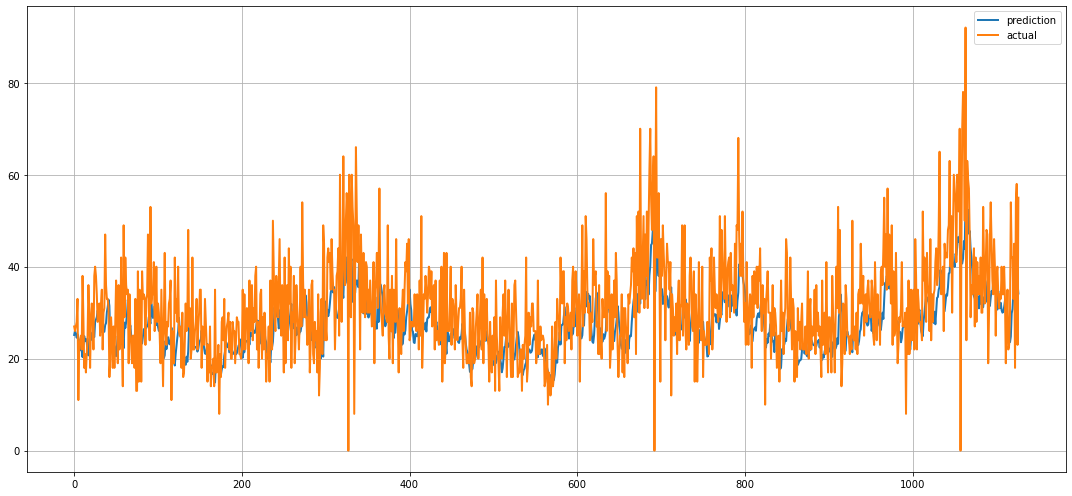

In [27]:
model = plot_model_results(X, y, plot_intervals=True)